<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S9/S9Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount your G-Drive**

In [1]:
from __future__ import print_function
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Add Library Path in your def search path**

In [2]:
import sys
sys.path.append('/content/drive/My Drive/EVA4/lib2')
!ls '/content/drive/My Drive/EVA4/lib2'

alb2.py		displayData.py	Gradcam.py   resNet.py
DataLoaders.py	execute.py	__pycache__  rohan_library.py


**Import required libraries**

In [3]:
from rohan_library import *
import execute
from resNet import ResNet18
import displayData as display
import Gradcam 
# from Gradcam import GRADCAM, PLOT
import albumentations as alb
import DataLoaders as loader
import alb2

REQUIRED LIBRARIES LOADED...


**Albumentations**

In [0]:
from alb2 import album_compose
albTrain = album_compose()
albTest = Compose([Normalize(mean=[0.5, 0.5, 0.5], std = [0.5, 0.5, 0.5]), ToTensor()])

**Load the Datasets**

In [5]:
train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = albTrain)
test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = albTest)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


**DataLoader for Train & Test Dataset**

In [0]:
dl = loader.DataLoaders()
trainLoader = dl.dataLoader(train)
testLoader = dl.dataLoader(test)


In [7]:
dataiter = iter(trainLoader)

images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([128, 3, 32, 32])
torch.Size([128])


**Displaying Random Images**

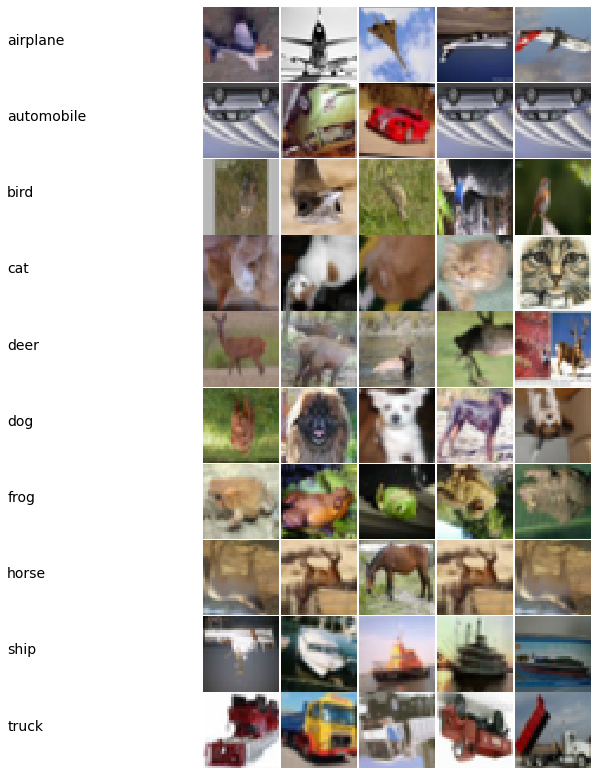

In [8]:
display.classImages(trainLoader)

**Model Summary**

In [9]:
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('Device set to ', device)

model = ResNet18().to(device)
summary(model, input_size=(3,32,32))

Device set to  cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-1

**Modelling**

In [10]:
incorrectSamples = []
correctSamples = []
correctLabels = []
model = ResNet18().to(device)


criterion = execute.cross_entropy_loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainLoader), epochs = 15)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.1)


model1 = execute.Test_Train()
EPOCHS = 15

for epoch in range(1, EPOCHS+1):
  print('EPOCH: ',epoch)
  model1.train(model, device, trainLoader, optimizer, epoch, scheduler, criterion, L1lambda = 1e-5 )

  model1.test(model, device, testLoader, 'model1.pt', criterion, correctSamples, correctLabels, incorrectSamples)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH:  1


Loss=2.589322090148926 Batch_id=390 Accuracy=41.63: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.2301).  Saving model ...

Test set: Average loss: 1.2301, Accuracy: 4494/10000 (44.94%)

EPOCH:  2


Loss=2.135439872741699 Batch_id=390 Accuracy=55.86: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.2301 --> 1.0154).  Saving model ...

Test set: Average loss: 1.0154, Accuracy: 5840/10000 (58.40%)

EPOCH:  3


Loss=1.7824676036834717 Batch_id=390 Accuracy=65.16: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0154 --> 0.7973).  Saving model ...

Test set: Average loss: 0.7973, Accuracy: 6244/10000 (62.44%)

EPOCH:  4


Loss=1.3823676109313965 Batch_id=390 Accuracy=70.18: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8201, Accuracy: 6593/10000 (65.93%)

EPOCH:  5


Loss=1.3883634805679321 Batch_id=390 Accuracy=73.62: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2626, Accuracy: 6965/10000 (69.65%)

EPOCH:  6


Loss=1.2829337120056152 Batch_id=390 Accuracy=76.13: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.9141, Accuracy: 7262/10000 (72.62%)

EPOCH:  7


Loss=1.3177387714385986 Batch_id=390 Accuracy=77.73: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7973 --> 0.4538).  Saving model ...

Test set: Average loss: 0.4538, Accuracy: 7520/10000 (75.20%)

EPOCH:  8


Loss=1.0419700145721436 Batch_id=390 Accuracy=79.45: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5597, Accuracy: 7592/10000 (75.92%)

EPOCH:  9


Loss=1.3028700351715088 Batch_id=390 Accuracy=80.87: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5371, Accuracy: 7979/10000 (79.79%)

EPOCH:  10


Loss=1.0698144435882568 Batch_id=390 Accuracy=82.57: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4538 --> 0.3694).  Saving model ...

Test set: Average loss: 0.3694, Accuracy: 7878/10000 (78.78%)

EPOCH:  11


Loss=0.9293636083602905 Batch_id=390 Accuracy=84.03: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.3694 --> 0.3560).  Saving model ...

Test set: Average loss: 0.3560, Accuracy: 8030/10000 (80.30%)

EPOCH:  12


Loss=0.9114506840705872 Batch_id=390 Accuracy=85.87: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4491, Accuracy: 8153/10000 (81.53%)

EPOCH:  13


Loss=0.7094569802284241 Batch_id=390 Accuracy=88.37: 100%|██████████| 391/391 [03:19<00:00,  1.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.3560 --> 0.2911).  Saving model ...

Test set: Average loss: 0.2911, Accuracy: 8495/10000 (84.95%)

EPOCH:  14


Loss=0.6548245549201965 Batch_id=390 Accuracy=90.98: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7004, Accuracy: 8703/10000 (87.03%)

EPOCH:  15


Loss=0.6864296793937683 Batch_id=390 Accuracy=92.66: 100%|██████████| 391/391 [03:18<00:00,  1.97it/s]



Test set: Average loss: 0.3963, Accuracy: 8789/10000 (87.89%)



**Plot Train & Test Curves**

Text(0.5, 1.0, 'Test Accuracy')

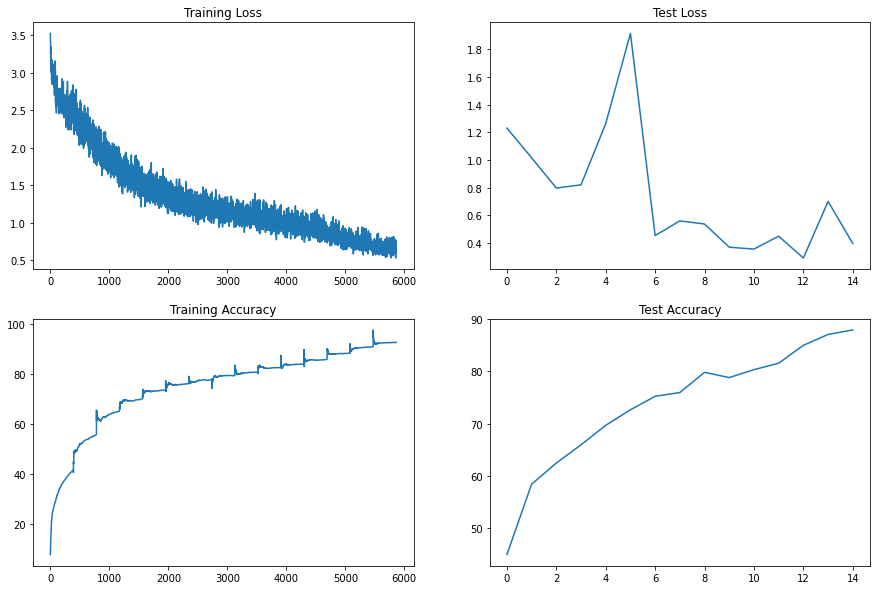

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")

**Data for GradCam**

In [40]:

images = [x['image'] for x in incorrectSamples[10:14]]
target_classes = [l['label'] for l in incorrectSamples[10:14]]
# print(images)
for i in target_classes:
  print(classes[i])


plane
dog
plane
dog


**GradCam Implementation**

torch.Size([4, 10])
Generating Grad-CAM @layer1
Generating Grad-CAM @layer2
Generating Grad-CAM @layer3
Generating Grad-CAM @layer4


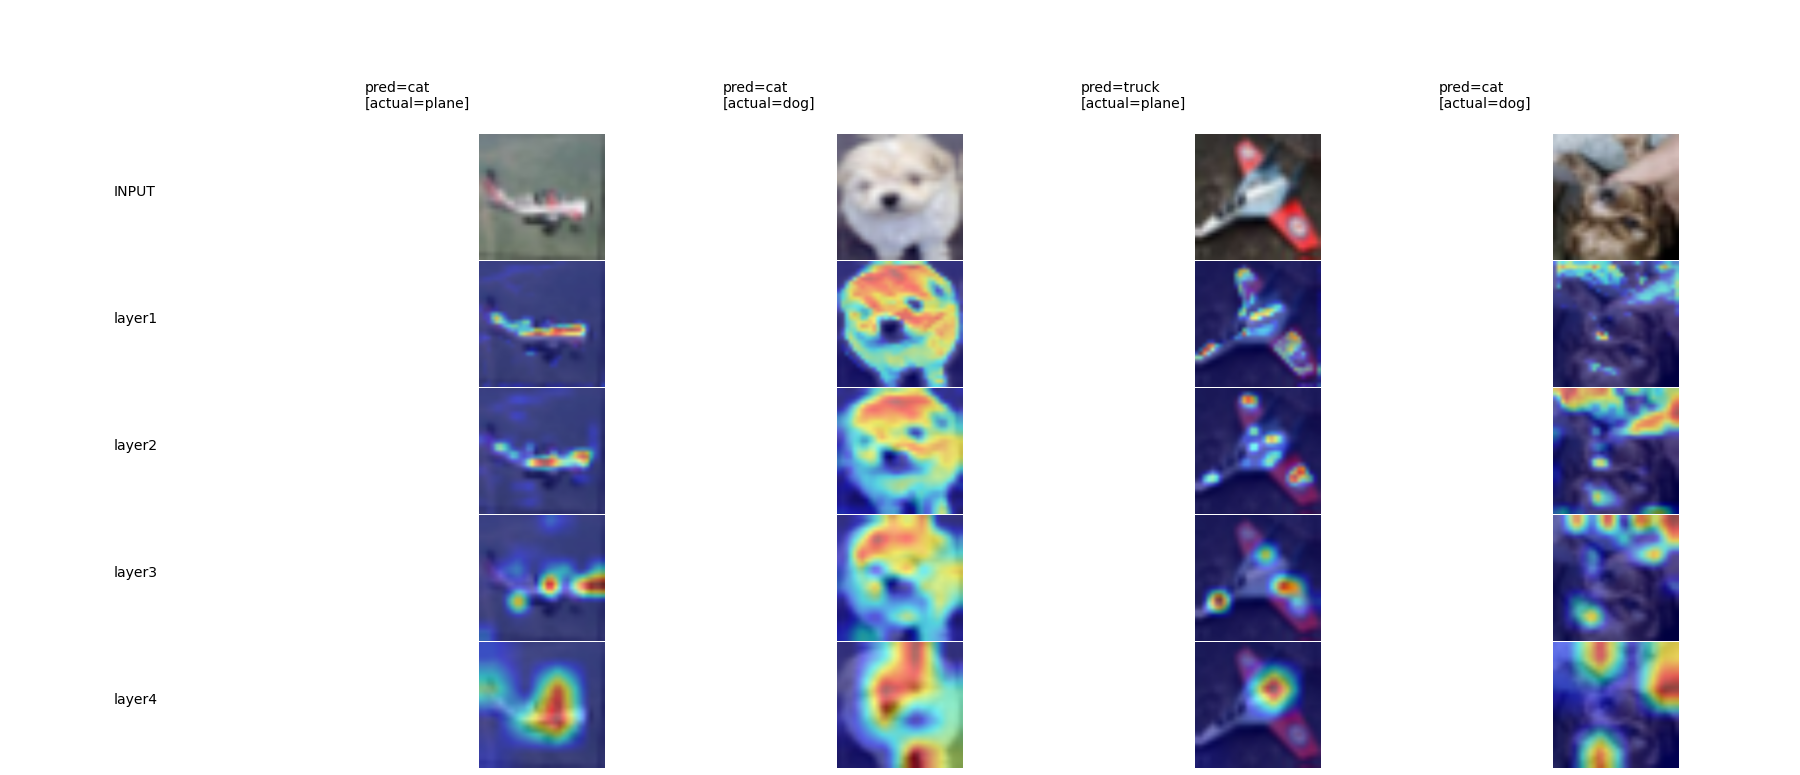

In [43]:
model = ResNet18().to(device)
image_size = (3,32,32)

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = Gradcam.GRADCAM(images, device, target_classes, model, target_layers)

Gradcam.PLOT(gradcam_output, images, target_classes, target_layers, classes, image_size, predicted_classes, display.unnormalize)


<Figure size 936x936 with 0 Axes>

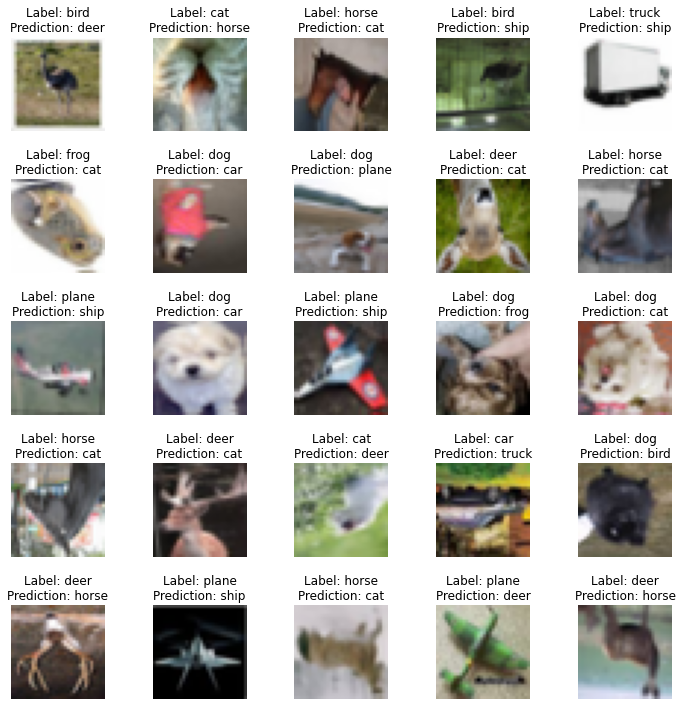

In [28]:
display.misclassifiedOnes(model, testLoader, incorrectSamples,'Misclassfied.png')